In [1]:
import pandas as pd
import numpy as np

In [2]:
#reading the dataset

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The attributes v1 to v28, time and amount are the independent variables which help in predicting whether the transaction made is from fraud credit car. 

In [4]:
# splitting attributes into dependent and independent variables

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
# splitting data using train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [7]:
# before undersampling checking the number of observatiosn of class 0 and class 1

y_train.value_counts()

Class
0    199025
1       339
Name: count, dtype: int64

<Axes: xlabel='Class'>

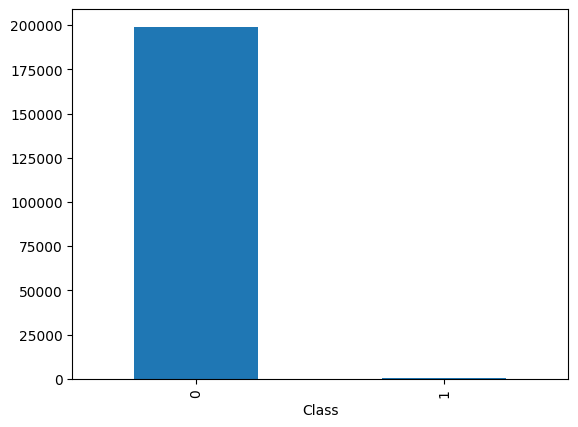

In [8]:
y_train.value_counts().plot(kind='bar')

As we can see, the data is highly imbalanced with 199009 observations in class 0 and 355 observations in class 1.

In [9]:
#fitting the logistic regression model and checking the accuracy and roc auc score

# import Logistic regression libraries 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

#fit the model
model=LogisticRegression(max_iter = 4000)
clf = model.fit(x_train, y_train)
pred = clf.predict(x_test)

#getting accuracy and roc auc score
print("Accuracy score for original data: ", accuracy_score(y_test, pred))
print("ROC AUC score for original data: ", roc_auc_score(y_test, pred))

Accuracy score for original data:  0.9991456292499094
ROC AUC score for original data:  0.810369581060235


Here, the accuracy is around 99% which is very high, but, as the data is highly imbalanced we wont get proper predictions. The ROC AUC score shows how well the classifier shows the positive and negative classes. In this case, the score is on the lower side, around 82%. Thus our predictions won't be correct. 

In [10]:
#performing undersampling

#importing necessary library
from imblearn.under_sampling import RandomUnderSampler

# performing undersampling

undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

# checking the number of observatiosn of class 1 and class 2 post sampling

y_train_under.value_counts()

Class
0    339
1    339
Name: count, dtype: int64

<Axes: xlabel='Class'>

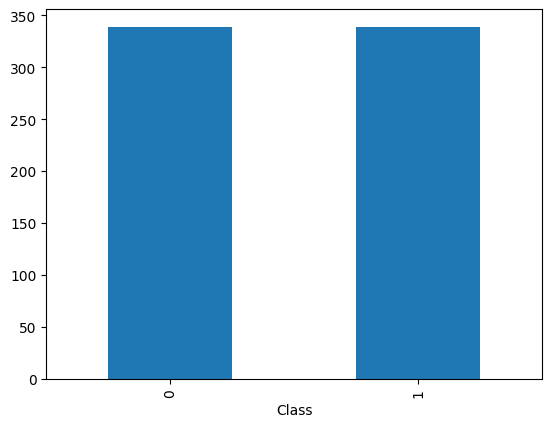

In [11]:
y_train_under.value_counts().plot(kind='bar')

After performing under sampling, the data is balanced and the abundant class observations are reduced to match the rare class observations. 

In [12]:
#fitting the logistic regression model on undersampled data to check the accuracy and roc auc score

# import Logistic regression libraries 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

#fitting the model
model=LogisticRegression(max_iter = 4000)
clf_under = model.fit(x_train_under, y_train_under)
pred_under = clf_under.predict(x_test)

#getting accuracy and roc auc score
print("Accuracy score for undersampled data: ", accuracy_score(y_test, pred_under))
print("roc auc score for original data: ", roc_auc_score(y_test, pred_under))

Accuracy score for undersampled data:  0.9614245754479595
roc auc score for original data:  0.9382702383333449


We have got a much better ROC AUC score and a good accuracy. Hence, the predictions will be better than the unbalanced data. 

In [13]:
#performing over sampling

# importing required library
from imblearn.over_sampling import RandomOverSampler

# performing oversampling

oversample = RandomOverSampler(sampling_strategy = 'minority')
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)

# checking the number of observatiosn of class 1 and class 2 post sampling

y_train_over.value_counts()

Class
0    199025
1    199025
Name: count, dtype: int64

<Axes: xlabel='Class'>

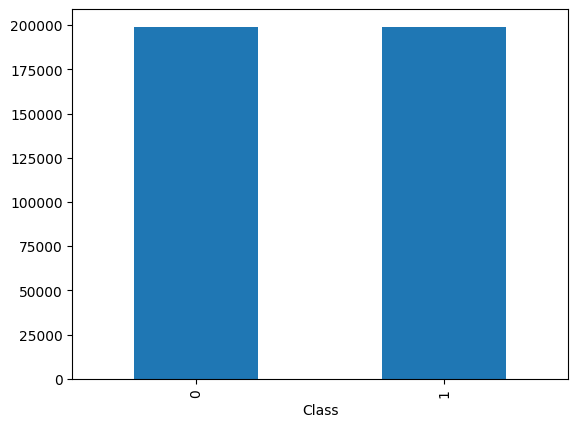

In [14]:
y_train_over.value_counts().plot(kind='bar')

In [15]:
#fitting the logistic regression model on oversampled data to check the accuracy and roc auc score

# import Logistic Regression libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

model=LogisticRegression(max_iter = 4000)
clf_over = model.fit(x_train_over, y_train_over)
pred_over = clf_over.predict(x_test)

print("Accuracy score for oversampled data: ", accuracy_score(y_test, pred_over))
print("ROC AUC score for oversampled data: ", roc_auc_score(y_test, pred_over))

Accuracy score for oversampled data:  0.9638706506091781
ROC AUC score for oversampled data:  0.9231849123750802


In [16]:
#resampling using SMOTE

# importing library

from imblearn.over_sampling import SMOTE

# performing SMOTE

smote = SMOTE(random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# checking the number of observatiosn of class 1 and class 2 post sampling

y_train_resampled.value_counts()

Class
0    199025
1    199025
Name: count, dtype: int64

<Axes: xlabel='Class'>

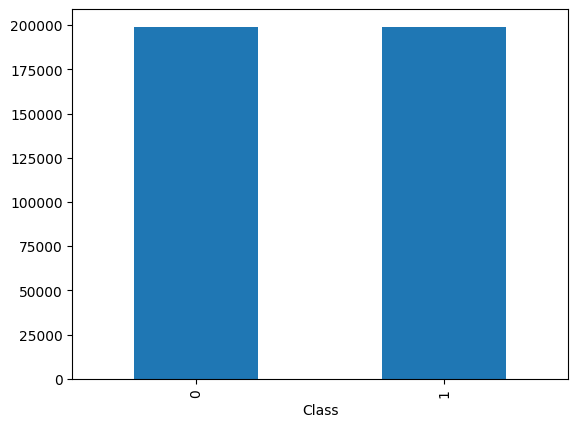

In [17]:
y_train_resampled.value_counts().plot(kind='bar')

In [18]:
#he logistic regression model on resampled data (SMOTE) to check the accuracy and roc auc score

# import Logistic Regression libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

model=LogisticRegression(max_iter = 4000)
clf_resampled = model.fit(x_train_resampled, y_train_resampled)
pred_resampled = clf_resampled.predict(x_test)

print("Accuracy score for resampled data: ", accuracy_score(y_test, pred_resampled))
print("ROC AUC score for resampled data: ", roc_auc_score(y_test, pred_resampled))

Accuracy score for resampled data:  0.9663050220614913
ROC AUC score for resampled data:  0.914617947073307


The accuracy and roc auc score is much better as compared to the imbalanced daya.

Comparing the accuracies and roc auc score of all the different sampled data and the imbalanced data, it is clear that the resampled data gives a better roc auc score and thus, the predictions are much better. 